## 3. Program FDTD (1D)

In [5]:
using Plots
gr()

# Parameters
N = 120
H = zeros(N)
E = zeros(N)

μ = 4*pi*1e-7      # H/m
ϵ = 8.85e-12       # F/m


c = 3e8             # m/s
f = 2e9
λ = c/f

dx = λ/20          # m

dt = dx/(2*c)
 

# Create animation
anim = @animate for iter in 1:100
    # Update H
    for x in 1:N-1
        H[x] += dt/(μ*dx)*(E[x] - E[x+1])
    end

    # Update E
    for x in 2:N
        E[x] += dt/(ϵ*dx)*(H[x-1] - H[x])
    end


    E[Int(N/2)] = sin(iter*dt*2*pi*f)

    # Plot E for this frame
    p = plot(1:N, zeros(N), E, ylim=(-5,5), zlim=(-5,5), xlim=(1,N), title="E/H field at t=$(round(iter*dt*1e9, digits=2)) ns",
         xlabel="x", ylabel="E", legend=false)
    
    plot!(1:N, 377 .* H, zeros(N),
          lw=2, label="H")
end

Animation("/tmp/jl_uvlBCc", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

## Test the FDTM Equations
A sinusoidal E source is applied at cell 60 in the middle. Blue line represents E field, red line represents H field.

[ Info: Saved animation to /home/vlsh/Source/ece-6340/E_wave.gif


Plots.AnimatedGif("/home/vlsh/Source/ece-6340/E_wave.gif")
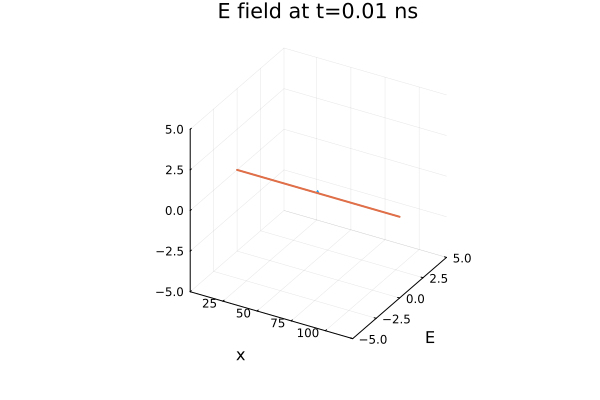

In [2]:
# Save as GIF
gif(anim, "E_wave.gif", fps=20)

In [12]:
using Plots
gr()

# Parameters
N = 120
H = zeros(N)
E = zeros(N)

μ = 4*pi*1e-7      # H/m
ϵ = 8.85e-12       # F/m


c = 3e8             # m/s
f = 2e9
λ = c/f

dx = λ/20          # m

dt = dx/(2*c)
 

# Create animation
anim = @animate for iter in 1:100
    # Update H
    for x in 1:N-1
        H[x] += dt/(μ*dx)*(E[x] - E[x+1])
    end

    # Update E
    for x in 2:N
        E[x] += dt/(ϵ*dx)*(H[x-1] - H[x])
    end

    # Pulsed signal source
    if iter*dt < 1/f
        E[Int(N/2)] = 1-cos(iter*dt*2*pi*f)
    else
        E[Int(N/2)] = 0
    end
    # Plot E for this frame
    p = plot(1:N, zeros(N), E, ylim=(-5,5), zlim=(-5,5), xlim=(1,N), title="E/H field at t=$(round(iter*dt*1e9, digits=2)) ns",
         xlabel="x", ylabel="E", legend=false)
    
    plot!(1:N, 377 .* H, zeros(N),
          lw=2, label="H")
end

Animation("/tmp/jl_8e7o5x", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

[ Info: Saved animation to /home/vlsh/Source/ece-6340/E_wave2.gif


Plots.AnimatedGif("/home/vlsh/Source/ece-6340/E_wave2.gif")
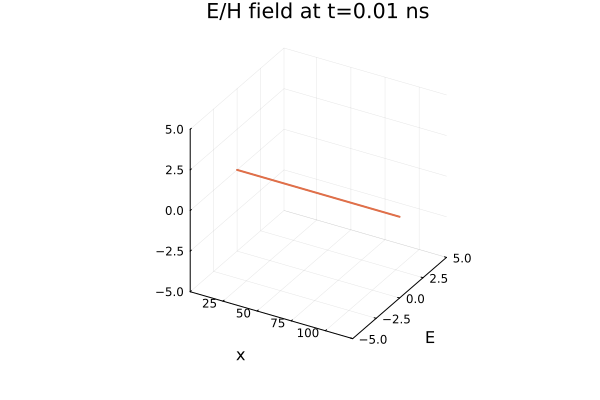

In [11]:
# Save as GIF
gif(anim, "E_wave2.gif", fps=20)